## CoreCoil VC function Simulation

In [75]:
import femm
import numpy as np
import cmath
import scipy.optimize as opt
import matplotlib.pyplot as plt


In [76]:
# The package must be initialized with the openfemm command.
femm.openfemm()
# We need to create a new Magnetostatics document to work on.
femm.newdocument(0)

### Main parameters

In [77]:
# - parameters of the coils
#     - Outercoils (OC): 2 coils
#     - Middlecoil (MC): 1 coil
#     - Corecoil   (CC): 1 coil
#     - Magnet      (M): 1 magnet

# geometry of outer coils (OC): include upper and lower coils
OC_wire_type         = "100um"
OC_wire_diameter     = 0.1 # mm
OC_wire_insulation   = 0 # mm
OC_wire_layer        = 16     # number of layers
OC_length            = 3      # mm
OC_inner_diameter    = 18     # mm
OC_outer_diameter    = 0      # mm (predefined as 0, need to be calculated)

# geometry of middle coil (MC)
MC_wire_type         = "100um"
MC_wire_diameter     = 0.1 # mm
MC_wire_insulation   = 0 # mm
MC_wire_layer        = 16     # number of layers
MC_length            = 3      # mm
MC_inner_diameter    = 18     # mm
MC_outer_diameter    = 0      # mm (predefined as 0, need to be calculated)

# geometry of core coil (CC)
CC_wire_type         = "100um"
CC_wire_diameter     = 0.1 # mm
CC_wire_insulation   = 0 # mm
CC_wire_layer        = 8      # number of layers
CC_length            = 12     # mm
CC_inner_diameter    = 10     # mm (predefined as 0, need to be calculated)
CC_outer_diameter    = 0      # mm      

# geometry of alu core (AluC)
# AluC_inner_diameter   = 10     # mm
# AluC_outer_diameter   = 12     # mm
Alu_diameter          = 10      # mm
AluC_length           = 12     # mm
AluC_material         = "Aluminum, 6061-T6"

# geometry of magnet
M_inner_diameter     = 10 # mm
M_outer_diameter     = 12 # mm
# M_diameter           = 8 # mm
M_length             = 6 # mm
M_material           = "N40"
M_vert_shift         = 0

# geometry of bobbin
OC_distance          = 16     # mm   
CC_offset_distance   = 0      # mm

input_signal = {
        'AC':     {'current': 0.02, 'frequency': 10000,},
        'DC':     {'current': 1,    'frequency': 0,},
        'OFF':    {'current': 0,    'frequency': 0,},
}

# define the problem type 
# precisions of 10^-10 for the solver
femm.mi_probdef(input_signal['DC']['frequency'], "millimeters", "axi", 1.e-10)

### femm geometry calculations


In [78]:
# femm geometry of OC: 2 coils

OC_outer_diameter = OC_inner_diameter + 2 * OC_wire_layer * (OC_wire_diameter + OC_wire_insulation * 2)
OC_upp_pos = (OC_distance + OC_length) / 2
OC_low_pos = (OC_distance - OC_length) / 2
OC_turns_per_layer = OC_length / (OC_wire_diameter + OC_wire_insulation * 2)
OC_turns = OC_turns_per_layer * OC_wire_layer

print(  "\nOC_inner_diameter: = {:.2f} mm".format(OC_inner_diameter),
        "\nOC_outer_diameter: = {:.2f} mm".format(OC_outer_diameter),      
        "\nOC_upp_pos: = {:.2f} mm".format(OC_upp_pos),
        "\nOC_low_pos: = {:.2f} mm".format(OC_low_pos),
        "\nOC_turns_per_layer: = {:.2f}".format(OC_turns_per_layer),
        "\nOC_turns: = {:.2f}".format(OC_turns))

# femm geometry of MC: 1 coil

MC_outer_diameter = MC_inner_diameter + 2 * MC_wire_layer * (MC_wire_diameter + MC_wire_insulation * 2)
MC_upp_pos =  MC_length / 2
MC_low_pos = -MC_length / 2
MC_turns_per_layer = MC_length / (MC_wire_diameter + MC_wire_insulation * 2)
MC_turns = MC_turns_per_layer * MC_wire_layer

print(  "\nMC_inner_diameter: = {:.2f} mm".format(MC_inner_diameter),
        "\nMC_outer_diameter: = {:.2f} mm".format(MC_outer_diameter),      
        "\nMC_upp_pos: = {:.2f} mm".format(MC_upp_pos),
        "\nMC_low_pos: = {:.2f} mm".format(MC_low_pos),
        "\nMC_turns_per_layer: = {:.2f}".format(MC_turns_per_layer),
        "\nMC_turns: = {:.2f}".format(MC_turns))

# femm geometry of CC: 1 coil

CC_outer_diameter= CC_inner_diameter + 2 * MC_wire_layer * (MC_wire_diameter + MC_wire_insulation * 2)
CC_upp_pos =  CC_length / 2
CC_low_pos = -CC_length / 2
CC_turns_per_layer = CC_length / (CC_wire_diameter + CC_wire_insulation * 2)
CC_turns = CC_turns_per_layer * CC_wire_layer

print(  "\nCC_inner_diameter: = {:.2f} mm".format(CC_inner_diameter),
        "\nCC_outer_diameter: = {:.2f} mm".format(CC_outer_diameter),      
        "\nCC_upp_pos: = {:.2f} mm".format(CC_upp_pos),
        "\nCC_low_pos: = {:.2f} mm".format(CC_low_pos),
        "\nCC_turns_per_layer: = {:.2f}".format(CC_turns_per_layer),
        "\nCC_turns: = {:.2f}".format(CC_turns))

# femm geometry of magnet
M_upp_pos =  M_length / 2 + M_vert_shift
M_low_pos = -M_length / 2 + M_vert_shift

print(  "\nM_upp_pos: = {:.2f} mm".format(M_upp_pos),
        "\nM_low_pos: = {:.2f} mm".format(M_low_pos))

# femm geometry of AluC
AluC_upp_pos =  AluC_length / 2
AluC_low_pos = -AluC_length / 2


print(  "\nAluC_length: = {:.2f} mm".format(AluC_length),
        "\nAluC_upp_pos: = {:.2f} mm".format(AluC_upp_pos),
        "\nAluC_low_pos: = {:.2f} mm".format(AluC_low_pos))



OC_inner_diameter: = 18.00 mm 
OC_outer_diameter: = 21.20 mm 
OC_upp_pos: = 9.50 mm 
OC_low_pos: = 6.50 mm 
OC_turns_per_layer: = 30.00 
OC_turns: = 480.00

MC_inner_diameter: = 18.00 mm 
MC_outer_diameter: = 21.20 mm 
MC_upp_pos: = 1.50 mm 
MC_low_pos: = -1.50 mm 
MC_turns_per_layer: = 30.00 
MC_turns: = 480.00

CC_inner_diameter: = 10.00 mm 
CC_outer_diameter: = 13.20 mm 
CC_upp_pos: = 6.00 mm 
CC_low_pos: = -6.00 mm 
CC_turns_per_layer: = 120.00 
CC_turns: = 960.00

M_upp_pos: = 3.00 mm 
M_low_pos: = -3.00 mm

AluC_length: = 12.00 mm 
AluC_upp_pos: = 6.00 mm 
AluC_low_pos: = -6.00 mm


### Build Geometry

In [79]:
# define for the circuit
OC_upp_circuit = "outercoil_upper"
OC_low_circuit = "outercoil_lower"
MC_circuit = "middlecoil"
CC_circuit = "corecoil"

# Outer coils geometry
# OC_upper
femm.mi_drawrectangle(OC_inner_diameter / 2, OC_low_pos, OC_outer_diameter / 2, OC_upp_pos)
femm.mi_addcircprop(OC_upp_circuit, 1, 1)
femm.mi_clearselected()
femm.mi_selectrectangle(OC_inner_diameter / 2, OC_low_pos, OC_outer_diameter / 2, OC_upp_pos, 4)
femm.mi_setgroup(1)
femm.mi_clearselected()
femm.mi_addblocklabel(OC_inner_diameter / 2 + (OC_outer_diameter - OC_inner_diameter) / 4, (OC_upp_pos + OC_low_pos) / 2)
femm.mi_selectlabel(OC_inner_diameter / 2 + (OC_outer_diameter - OC_inner_diameter) / 4, (OC_upp_pos + OC_low_pos) / 2)
femm.mi_addmaterial('100um', 1, 1, 0, 0, 58, 0, 0, 1, 3, 0, 0, 1, 0.1)
femm.mi_setblockprop(OC_wire_type, 0, 0.1, OC_upp_circuit, 0, 1, OC_turns)
femm.mi_clearselected()

# OC_lower
femm.mi_drawrectangle(OC_inner_diameter / 2, -OC_low_pos, OC_outer_diameter / 2, -OC_upp_pos)
femm.mi_addcircprop(OC_low_circuit, -1, 1)
femm.mi_clearselected()
femm.mi_selectrectangle(OC_inner_diameter / 2, -OC_low_pos, OC_outer_diameter / 2, -OC_upp_pos, 4)
femm.mi_setgroup(2)
femm.mi_clearselected()
femm.mi_addblocklabel(OC_inner_diameter / 2 + (OC_outer_diameter - OC_inner_diameter) / 4, -(OC_upp_pos + OC_low_pos) / 2)
femm.mi_selectlabel(OC_inner_diameter / 2 + (OC_outer_diameter - OC_inner_diameter) / 4, -(OC_upp_pos + OC_low_pos) / 2)
femm.mi_addmaterial('100um', 1, 1, 0, 0, 58, 0, 0, 1, 3, 0, 0, 1, 0.1)
femm.mi_setblockprop(OC_wire_type, 0, 0.1, OC_low_circuit, 0, 2, OC_turns)
femm.mi_clearselected()

# Middle coil geometry
femm.mi_drawrectangle(MC_inner_diameter / 2, MC_low_pos, MC_outer_diameter / 2, MC_upp_pos)
femm.mi_addcircprop(MC_circuit, 0, 1)
femm.mi_addmaterial('100um', 1, 1, 0, 0, 58, 0, 0, 1, 3, 0, 0, 1, 0.1)
femm.mi_clearselected()
femm.mi_selectrectangle(MC_inner_diameter / 2, MC_low_pos, MC_outer_diameter / 2, MC_upp_pos, 4)
femm.mi_setgroup(3)
femm.mi_clearselected()
femm.mi_addblocklabel(MC_inner_diameter / 2 + (MC_outer_diameter - MC_inner_diameter) / 4, (MC_upp_pos + MC_low_pos) / 2)
femm.mi_selectlabel(MC_inner_diameter / 2 + (MC_outer_diameter - MC_inner_diameter) / 4, (MC_upp_pos + MC_low_pos) / 2)
femm.mi_setblockprop(MC_wire_type, 0, 0.1, MC_circuit, 0, 3, MC_turns)
femm.mi_clearselected()

# # Core coil geometry
# femm.mi_drawrectangle(CC_inner_diameter / 2, CC_low_pos, CC_outer_diameter / 2, CC_upp_pos)
# femm.mi_addcircprop(CC_circuit, 0, 1)
# femm.mi_addmaterial('100um', 1, 1, 0, 0, 58, 0, 0, 1, 3, 0, 0, 1, 0.1)
# femm.mi_clearselected()
# femm.mi_selectrectangle(CC_inner_diameter / 2, CC_low_pos, CC_outer_diameter / 2, CC_upp_pos, 4)
# femm.mi_setgroup(4)
# femm.mi_clearselected()
# femm.mi_addblocklabel(CC_inner_diameter / 2 + (CC_outer_diameter - CC_inner_diameter) / 4,CC_upp_pos / 2)
# femm.mi_selectlabel(CC_inner_diameter / 2 + (CC_outer_diameter - CC_inner_diameter) / 4, CC_upp_pos  / 2)
# femm.mi_setblockprop(CC_wire_type, 1, 0, CC_circuit, 0, 4, CC_turns)
# femm.mi_clearselected()

# # Magnet geometry with a solid bar
# femm.mi_drawrectangle(0, M_low_pos, M_diameter / 2, M_upp_pos)
# femm.mi_getmaterial(M_material)
# femm.mi_clearselected()
# femm.mi_selectrectangle(0, M_low_pos, M_diameter / 2, M_upp_pos, 4)
# femm.mi_setgroup(5)
# femm.mi_addblocklabel(M_diameter / 4, (M_upp_pos + M_low_pos) / 2)
# femm.mi_selectlabel(M_diameter / 4, (M_upp_pos + M_low_pos) / 2)
# femm.mi_setblockprop(M_material, 0, 0.1, "", 90, 5, 0)
# femm.mi_clearselected()

# Magnet geometry, it got inner diameter and outerdiamter
femm.mi_drawrectangle(M_inner_diameter / 2, M_low_pos, M_outer_diameter / 2, M_upp_pos)
femm.mi_getmaterial(M_material)
femm.mi_clearselected()
femm.mi_selectrectangle(M_inner_diameter / 2, M_low_pos, M_outer_diameter / 2, M_upp_pos, 4)
femm.mi_setgroup(5)
femm.mi_addblocklabel(M_inner_diameter / 2 + (M_outer_diameter - M_inner_diameter) / 4, (M_upp_pos + M_low_pos) / 2)
femm.mi_selectlabel(M_inner_diameter / 2 + (M_outer_diameter - M_inner_diameter) / 4, (M_upp_pos + M_low_pos) / 2)
femm.mi_setblockprop(M_material, 0, 0.1, "", 90, 5, 0)
femm.mi_clearselected()

#AluC geometry with a solid bar
femm.mi_drawrectangle(0, AluC_low_pos, Alu_diameter / 2, AluC_upp_pos)
femm.mi_getmaterial(AluC_material)
femm.mi_clearselected()
femm.mi_selectrectangle(0, AluC_low_pos, Alu_diameter / 2, AluC_upp_pos, 4)
femm.mi_setgroup(6)
femm.mi_addblocklabel(Alu_diameter / 4, (AluC_upp_pos + AluC_low_pos) / 2)
femm.mi_selectlabel(Alu_diameter / 4, (AluC_upp_pos + AluC_low_pos) / 2)
femm.mi_setblockprop(AluC_material, 0, 0.1, "", 0, 6, 0)
femm.mi_clearselected()


# # AluC geometry it got inner diameter and outerdiamter
# femm.mi_drawrectangle(AluC_inner_diameter / 2, AluC_low_pos, AluC_outer_diameter / 2, AluC_upp_pos)
# femm.mi_getmaterial(AluC_material)
# femm.mi_clearselected()
# femm.mi_selectrectangle(AluC_inner_diameter / 2, AluC_low_pos, AluC_outer_diameter / 2, AluC_upp_pos, 4)
# femm.mi_setgroup(6)
# femm.mi_addblocklabel(AluC_inner_diameter / 2 + (AluC_outer_diameter - AluC_inner_diameter) / 4, (AluC_upp_pos + AluC_low_pos) / 2)
# femm.mi_selectlabel(AluC_inner_diameter / 2 + (AluC_outer_diameter - AluC_inner_diameter) / 4, (AluC_upp_pos + AluC_low_pos) / 2)
# femm.mi_setblockprop(AluC_material, 0, 0.1, "", 0, 6, 0)
# femm.mi_clearselected()

# AirSurrounding Structure
AirSpaceRadius_1 = 100
AirSpaceRadius_2 = 300
BC_Name = "Outside"
BC_Group = 10
# Airspace1
femm.mi_drawline(0, AirSpaceRadius_1, 0, -AirSpaceRadius_1)
femm.mi_drawarc(0, -AirSpaceRadius_1, 0, AirSpaceRadius_1, 180, 2)
femm.mi_getmaterial("Air")       
femm.mi_clearselected()
femm.mi_addblocklabel(AirSpaceRadius_1/4, AirSpaceRadius_1/2)
femm.mi_selectlabel(  AirSpaceRadius_1/4, AirSpaceRadius_1/2)
femm.mi_setblockprop("Air", 0, 0.5, '', 0, 0, 0)
femm.mi_clearselected()
# Airspace2              
femm.mi_drawline(0, AirSpaceRadius_2, 0, -AirSpaceRadius_2)
femm.mi_drawarc(0, -AirSpaceRadius_2, 0, AirSpaceRadius_2, 180, 2)
femm.mi_getmaterial("Air")  
femm.mi_clearselected()
femm.mi_addblocklabel(AirSpaceRadius_2/2, AirSpaceRadius_2/1.2)
femm.mi_selectlabel(  AirSpaceRadius_2/2, AirSpaceRadius_2/1.2)
femm.mi_setblockprop("Air", 1, 0, '', 0, 0, 0)
femm.mi_clearselected()
# Boundary properties
femm.mi_addboundprop(BC_Name, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
femm.mi_clearselected()
femm.mi_selectarcsegment(0, AirSpaceRadius_2)
femm.mi_setarcsegmentprop(2, BC_Name, 0, BC_Group)               
femm.mi_clearselected()

### VC simulation loop

In [80]:
# physical properties
CC_init_position    = -10      # mm
CC_step_size        = 1       # mm
CC_steps            = 20     # number of steps

OC_upper_Force = np.zeros(CC_steps+1)
OC_lower_Force = np.zeros(CC_steps+1)
MC_Forces = np.zeros(CC_steps+1)
M_Forces = np.zeros(CC_steps+1)
CC_pos = np.zeros(CC_steps+1)

In [81]:
femm.mi_selectgroup(5)
femm.mi_selectgroup(6)
femm.mi_movetranslate(0, CC_init_position)
femm.mi_clearselected()


In [82]:
for i in range(0,CC_steps+1):

    print(CC_init_position + CC_step_size*i)
    CC_pos[i] = CC_init_position + CC_step_size*i

    # Now, the finished input geometry can be displayed.
    #femm.mi_zoomnatural()
    femm.mi_zoom(-2,-50,50,50)
    femm.mi_refreshview()

    # We have to give the geometry a name before we can analyze it.
    femm.mi_saveas('FEMM_Corecoil_VC_func.fem')

    # Now,analyze the problem and load the solution when the analysis is finished
    femm.mi_analyze()
    femm.mi_loadsolution()

    if CC_steps == 0:
        # Show Density Plot:
        femm.mo_showdensityplot(1, 0.0001, 0.0001, 1.0E-9, "bmag")
                #--legend,	(0=hide, 1=show)
                #--gscale,	(0=color, 1=greyscale)
                #--upper_B,	(upperlimit for display)
                #--lower_B,	(lowerlimit for display)
                #--type		("bmag", "breal", "bimag" FluxDensity)
                #--			("hmag", "hreal", "himag" FieldIntensity)
                #--			("jmag", "jreal", "jimag" CurrentDensity)
        femm.mo_zoom(-2,-50,50,50)
        femm.mo_refreshview()

    femm.mo_groupselectblock(1)
    OC_upp_force = femm.mo_blockintegral(19)
    femm.mo_clearblock()

    femm.mo_groupselectblock(2)
    OC_low_force = femm.mo_blockintegral(19)
    femm.mo_clearblock()

    femm.mo_groupselectblock(3)
    MC_force = femm.mo_blockintegral(19)
    femm.mo_clearblock()

    femm.mo_groupselectblock(5)
    M_force = femm.mo_blockintegral(19)
    femm.mo_clearblock()

    print("Upper Outer Coil: Force = {:.6f} ".format(OC_upp_force))
    print("Lower Outer Coil: Force = {:.6f} ".format(OC_low_force))
    print("MiddleCoil: Force = {:.6f} ".format(MC_force))
    print("Magnet: Force = {:.6f} ".format(M_force))

    OC_upper_Force[i] = OC_upp_force
    OC_lower_Force[i] = OC_low_force
    MC_Forces[i] = MC_force
    M_Forces[i] = M_force
    
    # Translate inner coil to different distance
    femm.mi_selectgroup(5)
    femm.mi_selectgroup(6)
    femm.mi_movetranslate(0, CC_step_size)
    femm.mi_clearselected()

-10
Upper Outer Coil: Force = -0.015740 
Lower Outer Coil: Force = 0.570993 
MiddleCoil: Force = 0.000206 
Magnet: Force = -1.249955 
AluC: Force = -1.249955 
-9
Upper Outer Coil: Force = -0.028509 
Lower Outer Coil: Force = 0.283938 
MiddleCoil: Force = 0.000107 
Magnet: Force = -0.480949 
AluC: Force = -0.480949 
-8
Upper Outer Coil: Force = -0.043787 
Lower Outer Coil: Force = -0.061854 
MiddleCoil: Force = -0.000540 
Magnet: Force = 0.415801 
AluC: Force = 0.415801 
-7
Upper Outer Coil: Force = -0.062249 
Lower Outer Coil: Force = -0.410469 
MiddleCoil: Force = -0.001962 
Magnet: Force = 1.319201 
AluC: Force = 1.319201 
-6
Upper Outer Coil: Force = -0.084754 
Lower Outer Coil: Force = -0.695952 
MiddleCoil: Force = -0.003806 
Magnet: Force = 2.123779 
AluC: Force = 2.123779 
-5
Upper Outer Coil: Force = -0.112491 
Lower Outer Coil: Force = -0.868301 
MiddleCoil: Force = -0.003614 
Magnet: Force = 2.694142 
AluC: Force = 2.694142 
-4
Upper Outer Coil: Force = -0.146952 
Lower Outer

In [83]:
print(CC_pos)
print(MC_Forces)
print(M_Forces)
print(AluC_Forces)

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
[ 0.00020612  0.00010744 -0.00054039 -0.00196162 -0.00380605 -0.00361363
 -0.00343796 -0.00101426 -0.00049451 -0.00091578 -0.00091237  0.0016307
 -0.00430844  0.00304566  0.00025429  0.00157035  0.00205827  0.00175395
  0.00064423  0.00041983  0.00088351]
[-1.24995536e+00 -4.80948669e-01  4.15801314e-01  1.31920074e+00
  2.12377883e+00  2.69414177e+00  2.98710796e+00  3.14022418e+00
  3.08400045e+00  3.07348034e+00  3.04596929e+00  3.05498321e+00
  3.10066749e+00  3.11963635e+00  2.99769769e+00  1.57035107e-03
  2.11441395e+00  1.31479533e+00  6.44230118e-04 -5.19100566e-01
 -1.23703022e+00]
[-1.24995536e+00 -4.80948669e-01  4.15801314e-01  1.31920074e+00
  2.12377883e+00  2.69414177e+00  2.98710796e+00  3.14022418e+00
  3.08400045e+00  3.07348034e+00  3.04596929e+00  3.05498321e+00
  3.10066749e+00  3.11963635e+00  2.99769769e+00  1.57035107e-03
  2.11441395e+00  1.31479533e+00 

In [84]:
import h5py
path = '../data/'
filename = 'Corecoil_VC_alucore_d10_l12_clyindermagnet_d10_l6_20mm.h5'
# save the above data to a file

with h5py.File(path+filename, 'w') as f:
    f.create_dataset('CC_pos', data=CC_pos)
    f.create_dataset('OC_upper_Force', data=OC_upper_Force)
    f.create_dataset('OC_lower_Force', data=OC_lower_Force)
    f.create_dataset('MC_Forces', data=MC_Forces)
    f.create_dataset('M_Forces', data=M_Forces)
    f.create_dataset('AluC_Forces', data=AluC_Forces)


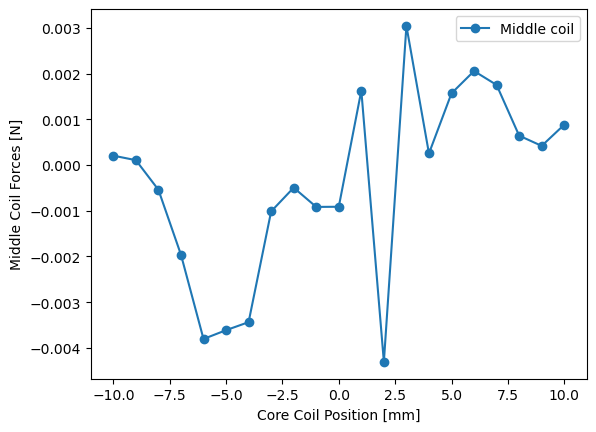

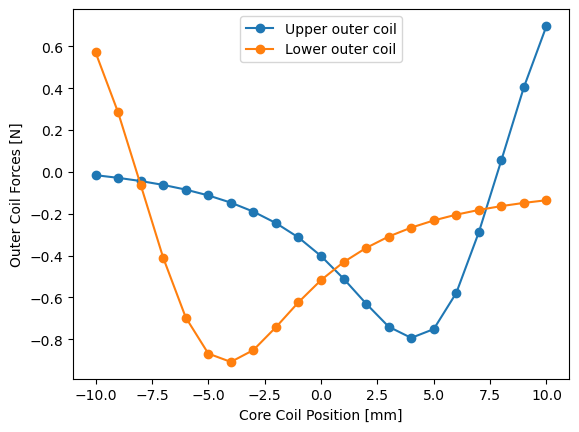

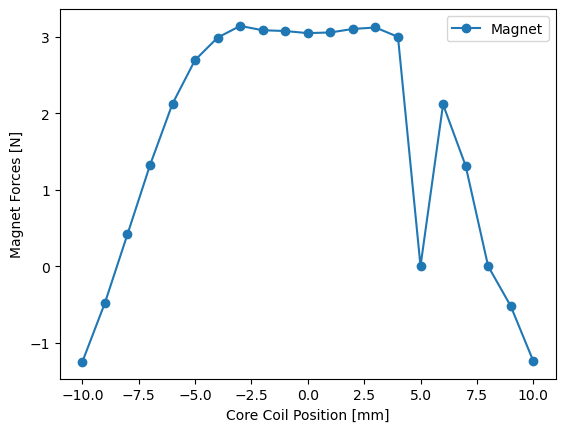

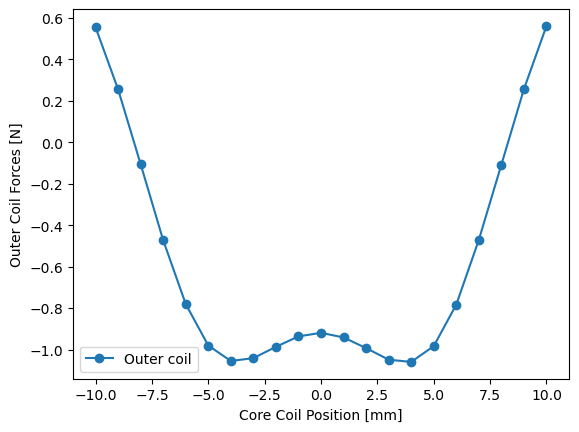

In [85]:
plt.plot(CC_pos, MC_Forces,'o-',label="Middle coil")
plt.ylabel('Middle Coil Forces [N]')
plt.xlabel('Core Coil Position [mm]')
plt.legend()
plt.show()

# plt.plot(CC_pos, AluC_Forces,'o-',label="AluC")
# plt.ylabel('AluC Forces [N]')
# plt.xlabel('Core Coil Position [mm]')
# plt.show()

plt.plot(CC_pos, OC_upper_Force,'o-',label="Upper outer coil")
plt.plot(CC_pos, OC_lower_Force,'o-',label="Lower outer coil")
plt.ylabel('Outer Coil Forces [N]')
plt.xlabel('Core Coil Position [mm]')
plt.legend()
plt.show()

plt.plot(CC_pos, M_Forces,'o-',label="Magnet")
plt.ylabel('Magnet Forces [N]')
plt.xlabel('Core Coil Position [mm]')
plt.legend()
plt.show()
plt.plot(CC_pos, OC_upper_Force + OC_lower_Force,'o-',label="Outer coil")
plt.ylabel('Outer Coil Forces [N]')
plt.xlabel('Core Coil Position [mm]')
plt.legend()
plt.show()
